# Imports and Config

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path

In [2]:
sns.set_theme(context="paper", style="whitegrid")

# Data

In [2]:
df = pd.read_csv("../data/EL_Stats_Review/panel_format.csv")

# Wrangle

In [3]:
# keep relevant columns
columns_to_keep = [
    # general information
    "Country", "Year", "pop", "Region", "SubRegion", "ISO3166_alpha3",
    # metrics
    'elect_twh', 'electbyfuel_total',
    'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
    'electbyfuel_nuclear', 'electbyfuel_hydro', 'hydro_twh',
    'electbyfuel_ren_power', 'wind_twh', 'solar_twh',
    'electbyfuel_other', 'biogeo_twh',
    'co2_combust_mtco2', 'co2_combust_pc',
]
df_all_countries = df[columns_to_keep].copy()

Text(0, 0.5, 'electricity generation [twh]')

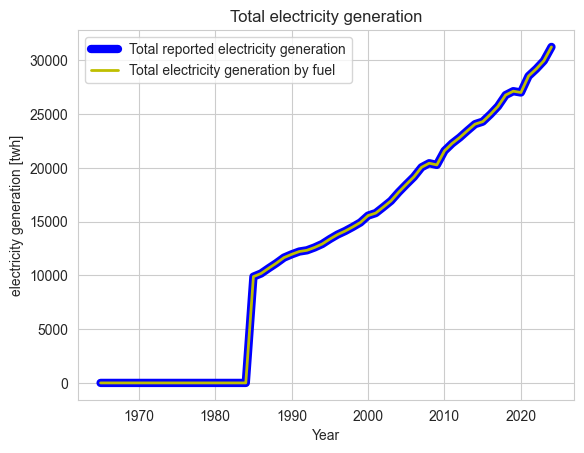

In [4]:
# show electbyfuel line
sns.lineplot(x="Year", y="elect_twh", data=df_all_countries[df_all_countries.Country == "Total World"], color="b", label="Total reported electricity generation", linewidth=6)
sns.lineplot(x="Year", y="electbyfuel_total", data=df_all_countries[df_all_countries.Country == "Total World"], color="y", label="Total electricity generation by fuel", alpha=1, linewidth=2)
plt.legend(loc='upper left')
plt.title("Total electricity generation")
plt.xlabel("Year")
plt.ylabel("electricity generation [twh]")

In [5]:
# remove all years before 1985
df_all_countries = df_all_countries[df_all_countries.Year >= 1985]

In [6]:
# remove all total "countries" (total world, etc.)
df_all_countries = df_all_countries[~df_all_countries['Country'].str.contains('total', case=False)]

In [16]:
# top 20 countries based on electricity production
top20_countries_2024 = df_all_countries[df_all_countries['Year'] == 2024].nlargest(20, 'elect_twh')['Country']
df_top20 = df_all_countries[df_all_countries['Country'].isin(top20_countries_2024)]
top20_countries_2024

1037                 China
7421                    US
2169                 India
5082    Russian Federation
2589                 Japan
714                 Brazil
894                 Canada
5460           South Korea
1803                France
1923               Germany
5142          Saudi Arabia
2289                  Iran
2229             Indonesia
3099                Mexico
7121               Turkiye
3768          Other Africa
7661               Vietnam
5862                Taiwan
5533                 Spain
7361        United Kingdom
Name: Country, dtype: object

In [9]:
# top 5 countries based on electricity production
top5_countries_2024 = df_all_countries[df_all_countries['Year'] == 2024].nlargest(5, 'elect_twh')['Country']
df_top5 = df_all_countries[df_all_countries['Country'].isin(top5_countries_2024)]
top5_countries_2024

1037                 China
7421                    US
2169                 India
5082    Russian Federation
2589                 Japan
Name: Country, dtype: object

In [10]:
# germany and austria
df_ger = df_all_countries[df_all_countries['Country']=="Germany"]
df_aus = df_all_countries[df_all_countries['Country']=="Austria"]

In [11]:
# missing values
df_all_countries.isna().sum()

Country                    0
Year                       0
pop                        0
Region                   585
SubRegion                585
ISO3166_alpha3             0
elect_twh                  0
electbyfuel_total          0
electbyfuel_coal           0
electbyfuel_gas            0
electbyfuel_oil            0
electbyfuel_nuclear        0
electbyfuel_hydro          0
hydro_twh                  0
electbyfuel_ren_power      0
wind_twh                   0
solar_twh                  0
electbyfuel_other          0
biogeo_twh                 0
co2_combust_mtco2          0
co2_combust_pc             0
dtype: int64

In [12]:
df_all_countries[df_all_countries.isna().any(axis=1)]

,Country,Year,pop,Region,SubRegion,ISO3166_alpha3,elect_twh,electbyfuel_total,electbyfuel_coal,electbyfuel_gas,...,electbyfuel_nuclear,electbyfuel_hydro,hydro_twh,electbyfuel_ren_power,wind_twh,solar_twh,electbyfuel_other,biogeo_twh,co2_combust_mtco2,co2_combust_pc
3729,Other Africa,1985,429.764212,NaN,NaN,O-AFR,65.622338,85.241338,4.111336,18.690,...,0.0,39.677685,38.545685,0.269,0,0,0.108737,0.269,134.932608,0.005536
3730,Other Africa,1986,442.233889,NaN,NaN,O-AFR,68.662666,89.407666,6.090250,18.060,...,0.0,40.550373,39.657373,0.659,0,0,0.105895,0.659,133.352741,0.005403
3731,Other Africa,1987,455.102396,NaN,NaN,O-AFR,71.509025,92.232025,9.454476,19.868,...,0.0,38.469960,37.145960,0.658,0,0,0.109000,0.658,142.168508,0.005507
3732,Other Africa,1988,468.108995,NaN,NaN,O-AFR,75.492120,98.442120,9.416726,20.854,...,0.0,41.602456,40.483456,0.626,0,0,0.109053,0.626,149.986120,0.005668
3733,Other Africa,1989,481.325760,NaN,NaN,O-AFR,78.326330,102.674330,8.748628,23.224,...,0.0,44.030215,42.647215,0.617,0,0,0.129105,0.617,154.219903,0.005753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,Rest of World,2020,0.000000,NaN,NaN,ROW,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000
4959,Rest of World,2021,0.000000,NaN,NaN,ROW,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000
4960,Rest of World,2022,0.000000,NaN,NaN,ROW,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000
4961,Rest of World,2023,0.000000,NaN,NaN,ROW,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000


In [ ]:
# elect_twh and electbyfuel_total
sns.lineplot(x="Year", y="elect_twh", data=df_all_countries, color="b")
sns.lineplot(x="Year", y="electbyfuel_total", data=df_all_countries, color='g')
# elect twh is total reported electricity production
# electbyfuel_total are all electbyfuel summed up

<Axes: xlabel='Year', ylabel='elect_twh'>

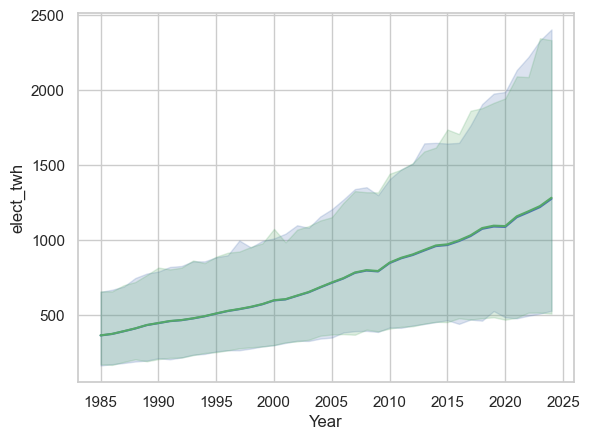

In [31]:
# elect_twh and electbyfuel_total for top 20 countires
sns.lineplot(x="Year", y="elect_twh", data=df_top20, color="b")
sns.lineplot(x="Year", y="electbyfuel_total", data=df_top20, color='g')

In [7]:

ref_df = pd.read_csv("../data/coordinates.csv")

In [13]:
df_final=df_all_countries.copy()
#df_final = df_all_countries.merge(ref_df, left_on='Country', right_on='name', how='left')
#df_final.dropna(axis=0, subset=['latitude', 'longitude'], inplace=True)

In [14]:
df_final

,Country,Year,pop,Region,SubRegion,ISO3166_alpha3,elect_twh,electbyfuel_total,electbyfuel_coal,electbyfuel_gas,...,electbyfuel_nuclear,electbyfuel_hydro,hydro_twh,electbyfuel_ren_power,wind_twh,solar_twh,electbyfuel_other,biogeo_twh,co2_combust_mtco2,co2_combust_pc
20,Algeria,1985,22.008544,Africa,Northern Africa,DZA,12.274,0.0,0.0,0.0,...,0.0,0.0,0.646,0.0,0,0,0.0,0.0,57.612452,0.042905
21,Algeria,1986,22.745499,Africa,Northern Africa,DZA,12.981,0.0,0.0,0.0,...,0.0,0.0,0.250,0.0,0,0,0.0,0.0,60.985563,0.043919
22,Algeria,1987,23.443624,Africa,Northern Africa,DZA,12.722,0.0,0.0,0.0,...,0.0,0.0,0.499,0.0,0,0,0.0,0.0,62.674558,0.043790
23,Algeria,1988,24.109536,Africa,Northern Africa,DZA,13.966,0.0,0.0,0.0,...,0.0,0.0,0.183,0.0,0,0,0.0,0.0,66.885057,0.045605
24,Algeria,1989,24.754485,Africa,Northern Africa,DZA,15.324,0.0,0.0,0.0,...,0.0,0.0,0.226,0.0,0,0,0.0,0.0,65.134723,0.043202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,Zimbabwe,2020,0.000000,Africa,Eastern Africa,ZWE,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0,0,0.0,0.0,0.000000,0.000000
7771,Zimbabwe,2021,0.000000,Africa,Eastern Africa,ZWE,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0,0,0.0,0.0,0.000000,0.000000
7772,Zimbabwe,2022,0.000000,Africa,Eastern Africa,ZWE,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0,0,0.0,0.0,0.000000,0.000000
7773,Zimbabwe,2023,0.000000,Africa,Eastern Africa,ZWE,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0,0,0.0,0.0,0.000000,0.000000


In [15]:
df_final.to_csv("../data/preprocessed.csv", index=False)

# Profile

## Electricity mix of top 20 countries

Text(0.5, 1.0, 'Total electricity generation by fuel for the top 20 countries')

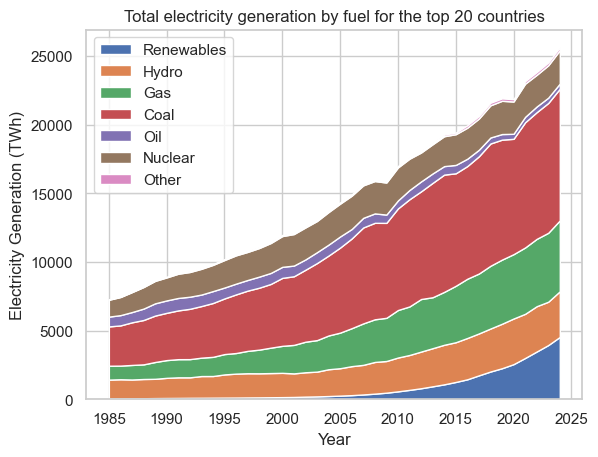

In [32]:
# sum up electricity sources over all countries
df_top20_sum = df_top20.groupby('Year')[[
    'electbyfuel_ren_power',
    'electbyfuel_hydro',
    'electbyfuel_gas',
    'electbyfuel_coal',
    'electbyfuel_oil',
    'electbyfuel_nuclear',
    'electbyfuel_other',
    'electbyfuel_total'
]].sum()
# create stackplot
plt.stackplot(
    df_top20_sum.index,
    df_top20_sum.electbyfuel_ren_power,
    df_top20_sum.electbyfuel_hydro,
    df_top20_sum.electbyfuel_gas,
    df_top20_sum.electbyfuel_coal,
    df_top20_sum.electbyfuel_oil,
    df_top20_sum.electbyfuel_nuclear,
    df_top20_sum.electbyfuel_other,
    labels=['Renewables', 'Hydro', 'Gas', 'Coal', 'Oil', 'Nuclear', 'Other']
)
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Electricity Generation (TWh)")
plt.title("Total electricity generation by fuel for the top 20 countries")

## Map of primary energy source

In [33]:
# get the primary energy source of 2024
df_all_countries_2024 = df_all_countries[df_all_countries['Year'] == 2024].copy()

fuel_cols = [
    'electbyfuel_coal',
    'electbyfuel_gas',
    'electbyfuel_oil',
    'electbyfuel_nuclear',
    'electbyfuel_hydro',
    'electbyfuel_ren_power'
]

df_all_countries_2024['top_fuel'] = df_all_countries_2024[fuel_cols].idxmax(axis=1)

# prepare world map
world = gpd.read_file("../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

world_topfuel = world.merge(
    df_all_countries_2024[['ISO3166_alpha3', 'top_fuel']],
    left_on='ISO_A3_EH',
    right_on='ISO3166_alpha3',
    how='left'
)


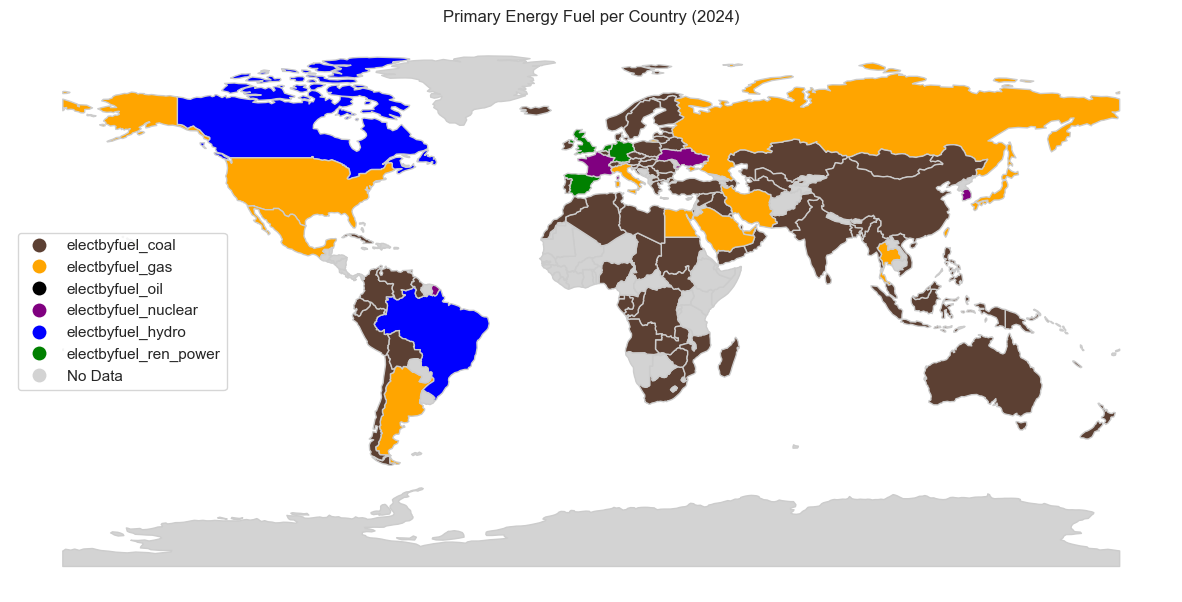

In [36]:
from matplotlib.colors import ListedColormap

world_topfuel['top_fuel'] = world_topfuel['top_fuel'].fillna('No Data')

# gewünschte Reihenfolge der Kategorien (muss mit fuel_colors.keys() übereinstimmen)
fuel_order = [
    'electbyfuel_coal',
    'electbyfuel_gas',
    'electbyfuel_oil',
    'electbyfuel_nuclear',
    'electbyfuel_hydro',
    'electbyfuel_ren_power',
    'No Data'
]



# 1) Kategorische Reihenfolge erzwingen
world_topfuel['top_fuel'] = pd.Categorical(
    world_topfuel['top_fuel'],
    categories=fuel_order,
    ordered=True
)

# colors
fuel_colors = [
    '#5c4033',    # coal
    'orange',   # gas
    'black',    # oil
    'purple',   # nuclear
    'blue',     # hydro
    'green',    # renewables
    'lightgray' # No Data
]
# colormap
cmap = ListedColormap(fuel_colors)

# plot
fig, ax = plt.subplots(1, 1, figsize=(15,8))
world_topfuel.plot(
    column='top_fuel',
    categorical=True,
    cmap=cmap,
    legend=True,
    edgecolor='0.8',
    ax=ax
)
ax.set_title('Primary Energy Fuel per Country (2024)')
ax.set_axis_off()
# move legend
leg = ax.get_legend()
if leg is not None:
    leg.set_bbox_to_anchor((0, 0.5)) 
    leg.set_loc('center left')
plt.show()

## Bar charts comparing top 20 countries

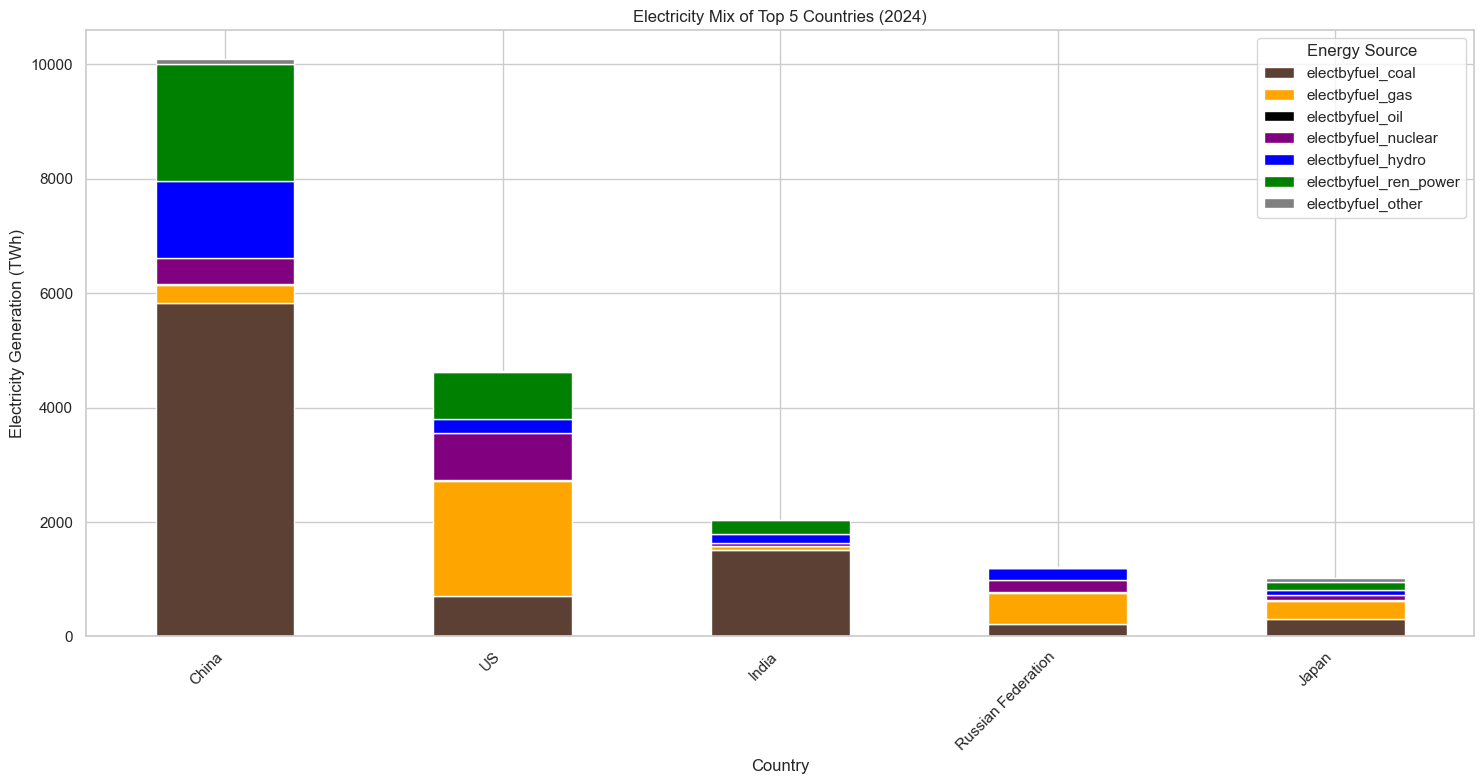

In [38]:
fuel_cols = [
    'electbyfuel_coal',
    'electbyfuel_gas',
    'electbyfuel_oil',
    'electbyfuel_nuclear',
    'electbyfuel_hydro',
    'electbyfuel_ren_power',
    'electbyfuel_other'
]

df_top5_2024 = df_top5[df_top5['Year'] == 2024]
df_plot = df_top5_2024.set_index('Country')[fuel_cols]
df_plot = df_plot.loc[df_plot.sum(axis=1).sort_values(ascending=False).index]

# define colors
colors = ['#5c4033', 'orange', 'black', 'purple', 'blue', 'green', 'gray']

# plot
df_plot.plot(kind='bar', stacked=True, color=colors, figsize=(15,8))
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Mix of Top 5 Countries (2024)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Energy Source')
plt.tight_layout()
plt.show()